In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'dataset_modelling.csv'
data = pd.read_csv(file_path)

In [3]:
# Prepare data
text = data['Review'].astype(str)
labels = data['Label']

In [4]:
# Convert labels to categorical format
label_dict = {'positive': 0, 'negative': 1, 'neutral': 2} 
labels = labels.map(label_dict)
labels = np.array(labels)

In [5]:
# Tokenization and sequence padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
max_len = max([len(seq) for seq in sequences])
data = pad_sequences(sequences, maxlen=max_len)

In [6]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
# Model architecture
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20


199/199 [==============================] - 93s 441ms/step - loss: 0.2933 - accuracy: 0.9110 - val_loss: 0.1200 - val_accuracy: 0.9430
Epoch 2/20
199/199 [==============================] - 89s 445ms/step - loss: 0.1106 - accuracy: 0.9514 - val_loss: 0.0975 - val_accuracy: 0.9584
Epoch 3/20
199/199 [==============================] - 91s 458ms/step - loss: 0.0691 - accuracy: 0.9745 - val_loss: 0.1000 - val_accuracy: 0.9653
Epoch 4/20
199/199 [==============================] - 93s 465ms/step - loss: 0.0431 - accuracy: 0.9886 - val_loss: 0.0658 - val_accuracy: 0.9802
Epoch 5/20
199/199 [==============================] - 92s 462ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.0843 - val_accuracy: 0.9726
Epoch 6/20
199/199 [==============================] - 93s 467ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0570 - val_accuracy: 0.9852
Epoch 7/20
199/199 [==============================] - 93s 466ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.0528 - val_

In [9]:
# Model evaluation and prediction
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

100/100 [==============================] - 9s 79ms/step


In [10]:
# Generate classification report
class_names = ['positive', 'negative', 'neutral']
print(classification_report(y_test, y_pred, target_names=class_names))


# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

              precision    recall  f1-score   support

    positive       0.99      0.99      0.99      2858
    negative       0.95      0.91      0.93       176
     neutral       0.84      0.87      0.85       140

    accuracy                           0.98      3174
   macro avg       0.93      0.93      0.93      3174
weighted avg       0.99      0.98      0.98      3174

Accuracy: 98.49%


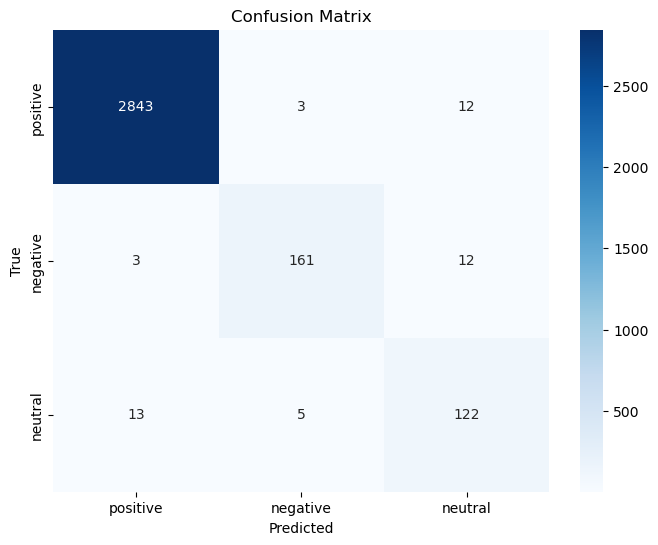

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

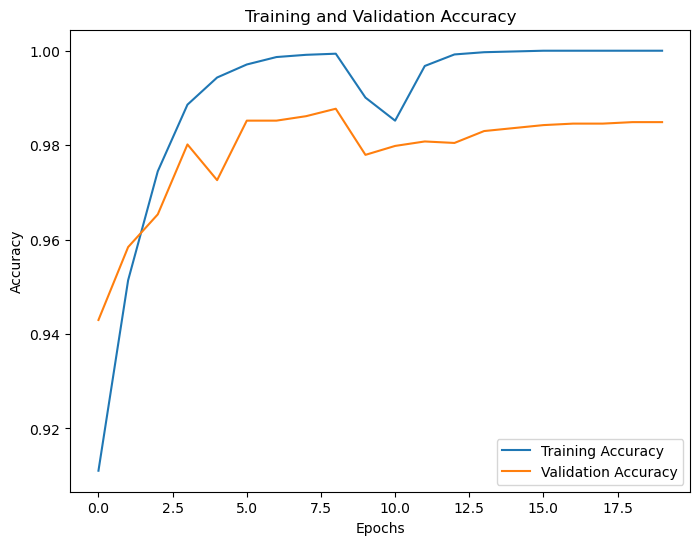

In [12]:
# Plotting performance
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

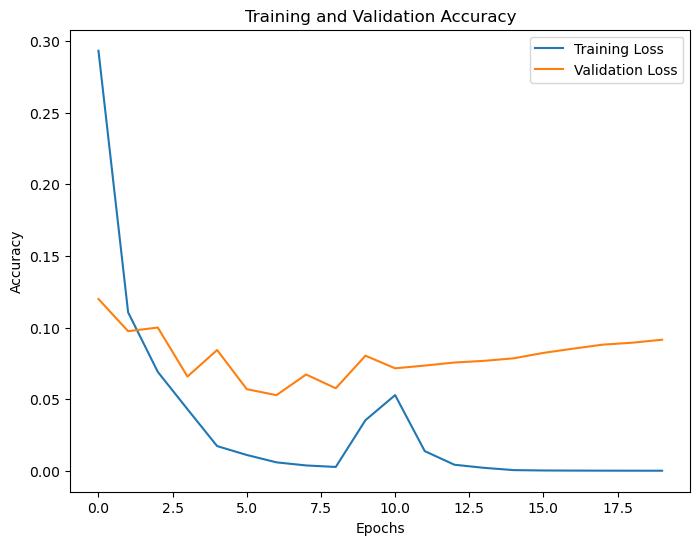

In [13]:
# Plotting performance
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [14]:
import tkinter as tk
from tkinter import font
from tkinter import messagebox
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume tokenizer and max_len are already defined and trained model is available

def preprocess_input(text):
    # Text preprocessing steps
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization and sequence padding
    sequence = tokenizer.texts_to_sequences([text])
    sequence_padded = pad_sequences(sequence, maxlen=max_len)
    return sequence_padded

def predict_sentiment(text):
    preprocessed_text = preprocess_input(text)
    prediction = model.predict(preprocessed_text)
    predicted_class = int(np.argmax(prediction, axis=1))
    if predicted_class == 0:
        return 'Positive'
    elif predicted_class == 1:
        return 'Negative'
    elif predicted_class == 2:
        return 'Neutral'

def submit_action():
    text = text_entry.get("1.0", "end-1c")
    if text.strip() == "":
        messagebox.showerror("Error", "Please enter some text.")
    else:
        sentiment = predict_sentiment(text)
        messagebox.showinfo("Sentiment Analysis Result", f"The sentiment of the text is: {sentiment}")

def reset_action():
    text_entry.delete("1.0", "end")

In [ ]:
import tkinter as tk
from tkinter import font
from tkinter import messagebox

def submit_action():
    text = text_entry.get("1.0", "end-1c")
    if text.strip() == "":
        messagebox.showerror("Error", "Please enter some text.")
    else:
        sentiment = predict_sentiment(text)
        messagebox.showinfo("Sentiment Analysis Result", f"The sentiment of the text is: {sentiment}")

def reset_action():
    text_entry.delete("1.0", "end")

# Create the main window
root = tk.Tk()
root.title("Sentiment Analysis of Clothing Reviews")

# Create a text input field
text_entry = tk.Text(root, height=10, width=50, wrap=tk.WORD)  # Set wrap option to tk.WORD
text_entry.pack()

# Create a frame to hold the buttons
button_frame = tk.Frame(root)
button_frame.pack()

# Create a submit button
submit_button = tk.Button(button_frame, text="Submit", command=submit_action, font=("Space Grotesk", 12))
submit_button.pack(side=tk.LEFT, padx=5)

# Create a reset button
reset_button = tk.Button(button_frame, text="Reset", command=reset_action, font=("Space Grotesk", 12))
reset_button.pack(side=tk.LEFT, padx=5)

# Run the main loop
root.mainloop()